In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

pd.set_option('display.max_columns', None)
plt.rcParams.update({'axes.labelsize': 13.5})

In [2]:
def saveFigure(figure, name):
    fig = figure.get_figure()
    fig.savefig(f'../imagenes/configuracionPistas/{name}.png', dpi=200, bbox_inches='tight')

In [3]:
path = Path('../data/runwayData')
files = list(path.glob('*.csv'))
print(f"{len(files)} Archivos cargados =======")

36761 Archivos cargados =======


In [4]:
def getGraphTitle(archivo):
    nombre = archivo.stem
    nombre = nombre.replace("Operation","").replace(";",":")
    return nombre

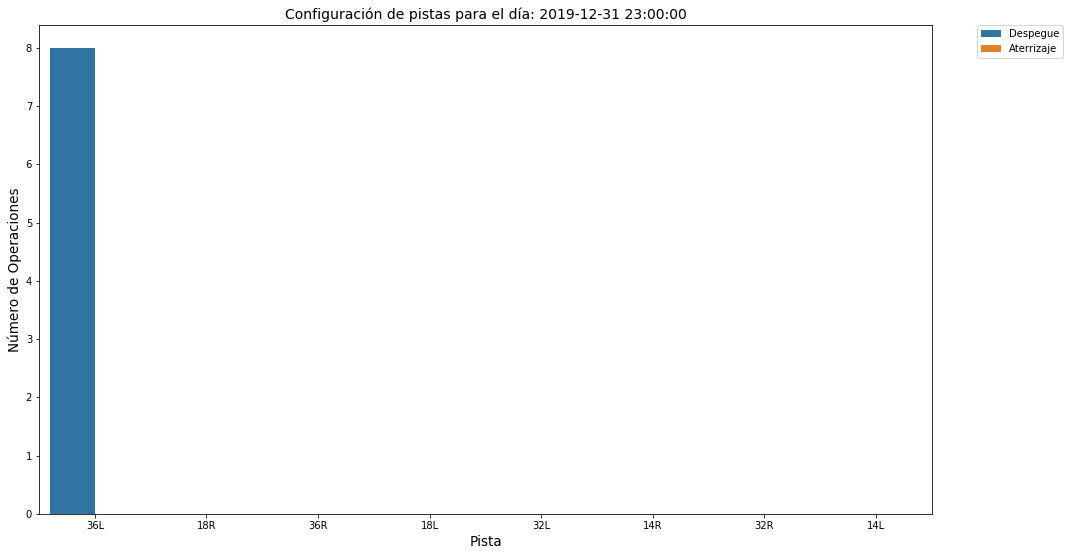

In [5]:
for idx, f in enumerate(files):
    plt.figure(figsize=(16,9))
    data = pd.read_csv(f, sep=';')
    sns_plot = sns.barplot(x='Runway', y="NumberOperations", hue='Type', data=data)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    nombre = getGraphTitle(f)

    plt.title(f"Configuración de pistas para el día: {nombre}", fontsize=14)
    plt.xlabel('Pista')
    plt.ylabel("Número de Operaciones")
    plt.show()

    fig = sns_plot.get_figure()
    saveFigure(sns_plot, f'Configuracion Pistas {nombre.replace(":", ";")}_{idx}')

    if idx % 1000 == 0:
        print(f"Configuracion {idx+1} de {len(files)}")

    clear_output(wait=True)